[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]]


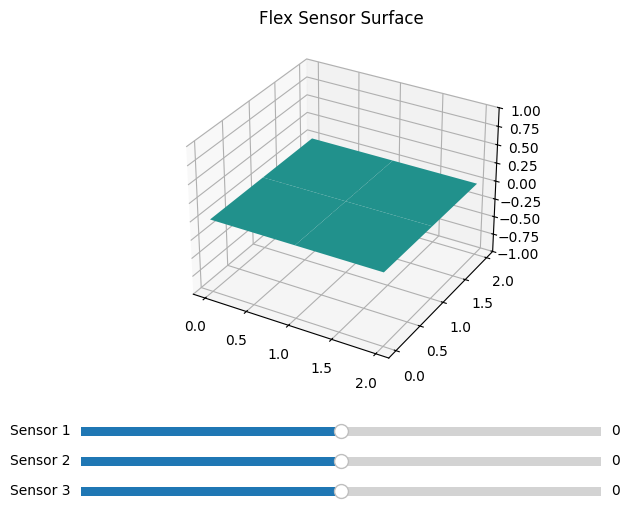

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.25, bottom=0.3)

# Sensor vals
sensor_vals = [0.0, 0.0, 0.0]

# plot meshgrid and map sensor values to grid
X, Y = np.meshgrid(range(3), range(3))
print(X)
print(Y)
Z = np.array([
    [0, sensor_vals[0], 0],
    [sensor_vals[1], 0, sensor_vals[2]],
    [0, 0, 0]
])

surf = ax.plot_surface(X, Y, Z, cmap='viridis', vmin=-1, vmax=1)
ax.set_zlim(-1, 1)
ax.set_title("Flex Sensor Surface")

# Add sliders
ax_s1 = plt.axes([0.25, 0.2, 0.65, 0.03])
ax_s2 = plt.axes([0.25, 0.15, 0.65, 0.03])
ax_s3 = plt.axes([0.25, 0.1, 0.65, 0.03])

s1 = Slider(ax_s1, 'Sensor 1', -1.0, 1.0, valinit=0)
s2 = Slider(ax_s2, 'Sensor 2', -1.0, 1.0, valinit=0)
s3 = Slider(ax_s3, 'Sensor 3', -1.0, 1.0, valinit=0)

display(s1)

# live update when sensor changes
def update(val):
    sensor_vals[0] = s1.val
    sensor_vals[1] = s2.val
    sensor_vals[2] = s3.val
    new_Z = np.array([
        [0, sensor_vals[0], 0],
        [sensor_vals[1], 0, sensor_vals[2]],
        [0, 0, 0]
    ])
    ax.plot_surface(X, Y, new_Z, cmap='viridis', vmin=-1, vmax=1)
    fig.canvas.draw_idle()

# set callbacks to our sliders
s1.on_changed(update)
s2.on_changed(update)
s3.on_changed(update)

plt.show()
